<a href="https://colab.research.google.com/github/noeffortnomoney/CS114.L22.KHCL/blob/main/Final%20Project/Google%20Colab/accuracy_0%2C75.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, TimeDistributed ,LSTM
from tensorflow.keras.utils import to_categorical

In [ ]:
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
import numpy as np
import pandas as pd

In [ ]:
datadir='/content/gdrive/My Drive/Dataset Chữ viết tay (Final)/dataset chữ viết tay Tiếng Việt (Final)'
dataset=[]

In [ ]:
def very_new_contrast(new_arrayzz):
  width , height = new_arrayzz.shape
  new_arrayzzz=new_arrayzz
  for x in range(0,width):
          for y in range(0,height):
              if new_arrayzzz[x,y] >= 210:            
                  new_arrayzzz[x,y] = 255
              elif new_arrayzzz[x,y] <=80 :
                  new_arrayzzz[x,y] = 0
              elif new_arrayzzz[x,y]>80 and new_arrayzzz[x,y]<=100:
                new_arrayzzz[x,y]=new_arrayzzz[x,y]//3-10
              elif new_arrayzzz[x,y]>100 and new_arrayzzz[x,y]<=140:
                new_arrayzzz[x,y]=new_arrayzzz[x,y]//2-30
              elif new_arrayzzz[x,y]>140 and new_arrayzzz[x,y]<190:
                new_arrayzzz[x,y]=new_arrayzzz[x,y]*2//3+10
  return new_arrayzzz

In [ ]:
def the_very_last_contrast_layer(new_arrayzz):
  width , height = new_arrayzz.shape
  new_arrayzzz=new_arrayzz
  for x in range(0,width):
          for y in range(0,height):
              if new_arrayzzz[x,y] >= 220:            
                  new_arrayzzz[x,y] = 255
              elif new_arrayzzz[x,y] <=40 :
                  new_arrayzzz[x,y] = 0
              elif new_arrayzzz[x,y]>40 and new_arrayzzz[x,y]<70:
                new_arrayzzz[x,y]=new_arrayzzz[x,y]*2//3-10
              elif new_arrayzzz[x,y]>70 and new_arrayzzz[x,y]<100:
                new_arrayzzz[x,y]=new_arrayzzz[x,y]//2+20
  return new_arrayzzz

In [ ]:
def the_last_contrast_layer(new_arrayzz):
  width , height = new_arrayzz.shape
  new_arrayzzz=new_arrayzz
  for x in range(0,width):
          for y in range(0,height):
              if new_arrayzzz[x,y] >= 220:            
                  new_arrayzzz[x,y] = 255
              elif new_arrayzzz[x,y] <=40 :
                  new_arrayzzz[x,y] = 0
              elif new_arrayzzz[x,y]>40 and new_arrayzzz[x,y]<80:
                new_arrayzzz[x,y]=new_arrayzzz[x,y]*2//3-10
  return new_arrayzzz

In [ ]:
categories=[]

In [ ]:
for label in os.listdir(datadir):
  categories.append(label)

In [ ]:
print(len(categories))

89


In [ ]:
for category in categories:
  path=os.path.join(datadir,category)
  class_num=categories.index(category)
  IMG_SIZE=28
  kernel = np.ones((1,1),np.uint8)
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    try:
      img_array1=the_very_last_contrast_layer(img_array)
      blur_img=cv2.GaussianBlur(img_array1,(3,3),1)
      new_array = cv2.adaptiveThreshold(blur_img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
              cv2.THRESH_BINARY,9,2)
      median_array=cv2.medianBlur(new_array,5)
      reversed_img=cv2.bitwise_not(median_array)
      resized_img=cv2.resize(reversed_img,(IMG_SIZE,IMG_SIZE))
      dataset.append([resized_img,class_num])
    except:
      pass

In [ ]:
print(len(dataset))

50114


In [ ]:
X=[]
y=[]

In [ ]:
import random
random.shuffle(dataset)

In [ ]:
for feature,label in dataset:
  X.append(feature)
  y.append(label)

In [ ]:
rotated_dataset=[]

In [ ]:
left_shift_dataset=[]

In [ ]:
shift_rotated_dataset=[]

In [ ]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [ ]:
rotate=iaa.Affine(rotate=(-10, -15),cval=0)
for index in range (len(X_train)):
  rotated_image=rotate.augment_image(X_train[index])
  rotated_dataset.append([rotated_image,y_train[index]])

In [ ]:
translate=iaa.Affine(translate_percent={"x": (-0.1, -0.05)},cval=0)
for index in range(len(X_train)):
  translated_image=translate.augment_image(X_train[index])
  left_shift_dataset.append([translated_image,y_train[index]])

In [ ]:
for index in range(len(left_shift_dataset)):
  translated_image=translate.augment_image(left_shift_dataset[index][0])
  shift_rotated_dataset.append([translated_image,left_shift_dataset[index][1]])

In [ ]:
New_Training_dataset=[]

In [ ]:
for index in range (len(rotated_dataset)):
  New_Training_dataset.append([rotated_dataset[index][0],rotated_dataset[index][1]])
for index in range(len(X_train)):
  New_Training_dataset.append([X_train[index],y_train[index]])
for index in range(len(left_shift_dataset)):
  New_Training_dataset.append([left_shift_dataset[index][0],left_shift_dataset[index][1]])
for index in range(len(shift_rotated_dataset)):
  New_Training_dataset.append([shift_rotated_dataset[index][0],shift_rotated_dataset[index][1]])

In [ ]:
print(len(New_Training_dataset))

120272


In [ ]:
random.shuffle(New_Training_dataset)

In [ ]:
X_trainz=[]
y_trainz=[]

In [ ]:
for feature,label in New_Training_dataset:
  X_trainz.append(feature)
  y_trainz.append(label)

In [ ]:
X_trainz =np.array(X_trainz).reshape(-1,28,28,1)
X_val=np.array(X_val).reshape(-1,28,28,1)
X_test=np.array(X_test).reshape(-1,28,28,1)

In [ ]:
y_trainz =tf.keras.utils .to_categorical(y_trainz)
y_val = tf.keras.utils.to_categorical(y_val)
y_test =tf.keras.utils.to_categorical(y_test)

In [ ]:
from tensorflow import keras
model=keras.models.load_model('/content/vggz_0,89.h5')


In [ ]:
X_trainz=X_trainz/255.0
X_val=X_val/255.0
X_test=X_test/255.0

In [ ]:
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau
optimizer = RMSprop(learning_rate=0.01, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
filepath="/content/vggz_0,89.h5"
learning_rate = ReduceLROnPlateau(monitor='val_loss', 
                                  mode='min',
                                  patience=2, 
                                  verbose=1, 
                                  factor=0.5, 
                                  min_lr=0.00001)
epochs = 10
batch_size = 128

In [ ]:
history = model.fit(X_trainz,y_trainz, batch_size=batch_size,
                              epochs = epochs, validation_data = (X_val,y_val),
                              verbose = 2, steps_per_epoch=X_trainz.shape[0] // batch_size
                              , callbacks=[learning_rate])

Epoch 1/10
939/939 - 2262s - loss: 1.6958 - accuracy: 0.5643 - val_loss: 1.2870 - val_accuracy: 0.6542
Epoch 2/10
939/939 - 2242s - loss: 1.3394 - accuracy: 0.6397 - val_loss: 1.0322 - val_accuracy: 0.7118
Epoch 3/10
939/939 - 2224s - loss: 1.2635 - accuracy: 0.6571 - val_loss: 1.0516 - val_accuracy: 0.7120
Epoch 4/10
939/939 - 2223s - loss: 1.2074 - accuracy: 0.6684 - val_loss: 1.0024 - val_accuracy: 0.7198
Epoch 5/10
939/939 - 2223s - loss: 1.1741 - accuracy: 0.6776 - val_loss: 1.0248 - val_accuracy: 0.7210
Epoch 6/10
939/939 - 2222s - loss: 1.1329 - accuracy: 0.6873 - val_loss: 0.9215 - val_accuracy: 0.7421
Epoch 7/10
939/939 - 2203s - loss: 1.1159 - accuracy: 0.6942 - val_loss: 0.9180 - val_accuracy: 0.7468
Epoch 8/10
939/939 - 2222s - loss: 1.0901 - accuracy: 0.6979 - val_loss: 0.9081 - val_accuracy: 0.7528
Epoch 9/10
939/939 - 2227s - loss: 1.0855 - accuracy: 0.7000 - val_loss: 0.9360 - val_accuracy: 0.7410
Epoch 10/10
939/939 - 2221s - loss: 1.0638 - accuracy: 0.7053 - val_loss:

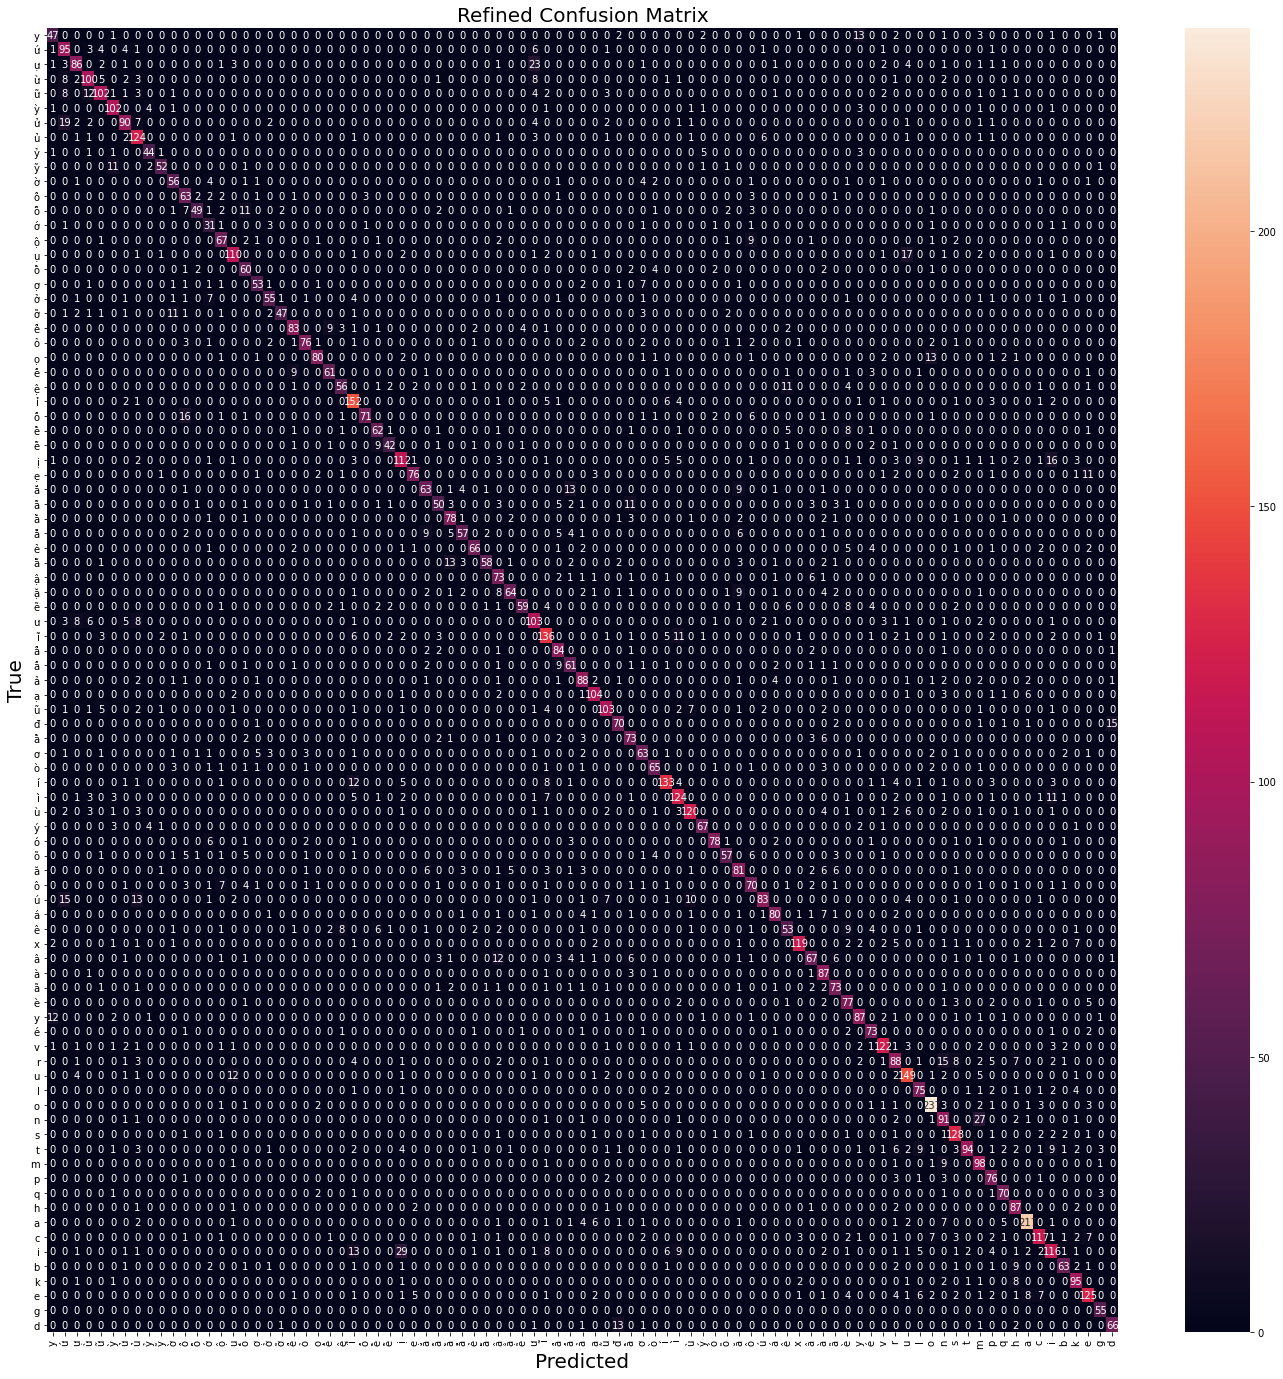

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

### Confusion Matrix
from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test, steps=len(X_val), verbose=0)
#y_pred=model.predict(x_test)
#y_pred = np.round(y_pred)
y_pred = np.argmax(predictions, axis=-1)

y_true=np.argmax(y_test, axis=-1)

cm = confusion_matrix(y_true, y_pred)

## Get Class Labels


# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(24, 24))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(categories, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(categories, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.savefig('ConMat24.png')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67        74
           1       0.61      0.81      0.69       118
           2       0.77      0.65      0.70       133
           3       0.74      0.75      0.74       134
           4       0.80      0.71      0.76       143
           5       0.78      0.88      0.83       116
           6       0.76      0.68      0.71       133
           7       0.67      0.86      0.75       145
           8       0.80      0.79      0.79        56
           9       0.87      0.75      0.81        69
          10       0.70      0.75      0.72        75
          11       0.57      0.80      0.67        79
          12       0.88      0.59      0.71        83
          13       0.49      0.72      0.58        43
          14       0.71      0.75      0.73        89
          15       0.81      0.78      0.79       141
          16       0.62      0.81      0.71        74
          17       0.79    